In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
IMG_SIZE = 224
BATCH = 32
SEED = 42

In [ ]:
main_path = "/content/drive/My Drive/siscer/chest_xray"

train_path = os.path.join(main_path, "train")
test_path = os.path.join(main_path, "test")

train_normal = glob.glob(os.path.join(train_path, "NORMAL/*.jpeg"))
train_pneumonia = glob.glob(os.path.join(train_path, "PNEUMONIA/*.jpeg"))

test_normal = glob.glob(os.path.join(test_path, "NORMAL/*.jpeg"))
test_pneumonia = glob.glob(os.path.join(test_path, "PNEUMONIA/*.jpeg"))


In [ ]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [ ]:
df_train

,class,image
0,Normal,/content/drive/My Drive/siscer/chest_xray/train/NORMAL/NORMAL-3493370-0001.jpeg
1,Normal,/content/drive/My Drive/siscer/chest_xray/train/NORMAL/NORMAL-3411116-0001.jpeg
2,Normal,/content/drive/My Drive/siscer/chest_xray/train/NORMAL/NORMAL-3514363-0003.jpeg
3,Normal,/content/drive/My Drive/siscer/chest_xray/train/NORMAL/NORMAL-3400382-0001.jpeg
4,Normal,/content/drive/My Drive/siscer/chest_xray/train/NORMAL/NORMAL-3411116-0003.jpeg
...,...,...
5227,Pneumonia,/content/drive/My Drive/siscer/chest_xray/train/PNEUMONIA/BACTERIA-4213815-0002.jpeg
5228,Pneumonia,/content/drive/My Drive/siscer/chest_xray/train/PNEUMONIA/BACTERIA-4180876-0001.jpeg
5229,Pneumonia,/content/drive/My Drive/siscer/chest_xray/train/PNEUMONIA/BACTERIA-4011726-0002.jpeg
5230,Pneumonia,/content/drive/My Drive/siscer/chest_xray/train/PNEUMONIA/BACTERIA-4177975-0001.jpeg


In [ ]:
df_test

,class,image
0,Normal,/content/drive/My Drive/siscer/chest_xray/test/NORMAL/NORMAL-1763721-0001.jpeg
1,Normal,/content/drive/My Drive/siscer/chest_xray/test/NORMAL/NORMAL-1212407-0001.jpeg
2,Normal,/content/drive/My Drive/siscer/chest_xray/test/NORMAL/NORMAL-1768815-0001.jpeg
3,Normal,/content/drive/My Drive/siscer/chest_xray/test/NORMAL/NORMAL-1318320-0001.jpeg
4,Normal,/content/drive/My Drive/siscer/chest_xray/test/NORMAL/NORMAL-1430636-0001.jpeg
...,...,...
619,Pneumonia,/content/drive/My Drive/siscer/chest_xray/test/PNEUMONIA/VIRUS-9584831-0001.jpeg
620,Pneumonia,/content/drive/My Drive/siscer/chest_xray/test/PNEUMONIA/VIRUS-9783315-0001.jpeg
621,Pneumonia,/content/drive/My Drive/siscer/chest_xray/test/PNEUMONIA/VIRUS-9890836-0001.jpeg
622,Pneumonia,/content/drive/My Drive/siscer/chest_xray/test/PNEUMONIA/VIRUS-9671740-0001.jpeg


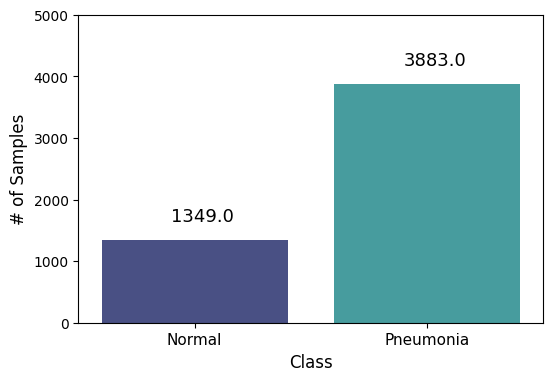

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)

plt.show()

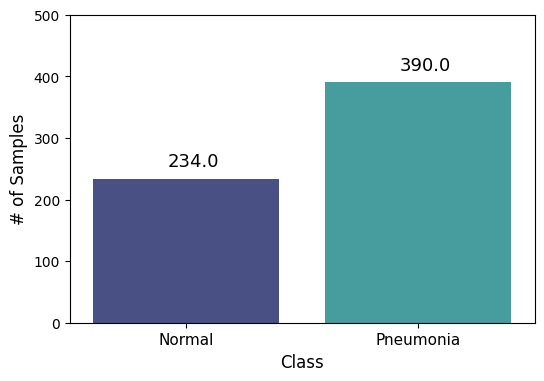

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_test, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,500)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+20), fontsize = 13)

plt.show()

In [ ]:
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = SEED, stratify = df_train['class'])

In [ ]:
train_df

,class,image
3566,Pneumonia,/content/drive/My Drive/siscer/chest_xray/train/PNEUMONIA/BACTERIA-4932029-0002.jpeg
2866,Pneumonia,/content/drive/My Drive/siscer/chest_xray/train/PNEUMONIA/BACTERIA-9402718-0001.jpeg
2681,Pneumonia,/content/drive/My Drive/siscer/chest_xray/train/PNEUMONIA/BACTERIA-8775500-0001.jpeg
1199,Normal,/content/drive/My Drive/siscer/chest_xray/train/NORMAL/NORMAL-2394904-0001.jpeg
4619,Pneumonia,/content/drive/My Drive/siscer/chest_xray/train/PNEUMONIA/BACTERIA-2065888-0003.jpeg
...,...,...
3476,Pneumonia,/content/drive/My Drive/siscer/chest_xray/train/PNEUMONIA/BACTERIA-4687423-0004.jpeg
678,Normal,/content/drive/My Drive/siscer/chest_xray/train/NORMAL/NORMAL-7964343-0002.jpeg
1560,Pneumonia,/content/drive/My Drive/siscer/chest_xray/train/PNEUMONIA/VIRUS-4611169-0002.jpeg
2769,Pneumonia,/content/drive/My Drive/siscer/chest_xray/train/PNEUMONIA/BACTERIA-9072988-0005.jpeg


In [ ]:
val_df

,class,image
2945,Pneumonia,/content/drive/My Drive/siscer/chest_xray/train/PNEUMONIA/BACTERIA-9822795-0001.jpeg
4878,Pneumonia,/content/drive/My Drive/siscer/chest_xray/train/PNEUMONIA/BACTERIA-2971615-0001.jpeg
3177,Pneumonia,/content/drive/My Drive/siscer/chest_xray/train/PNEUMONIA/VIRUS-2279309-0001.jpeg
972,Normal,/content/drive/My Drive/siscer/chest_xray/train/NORMAL/NORMAL-9868047-0005.jpeg
3059,Pneumonia,/content/drive/My Drive/siscer/chest_xray/train/PNEUMONIA/VIRUS-1596026-0002.jpeg
...,...,...
253,Normal,/content/drive/My Drive/siscer/chest_xray/train/NORMAL/NORMAL-5087693-0001.jpeg
4315,Pneumonia,/content/drive/My Drive/siscer/chest_xray/train/PNEUMONIA/BACTERIA-7560163-0001.jpeg
687,Normal,/content/drive/My Drive/siscer/chest_xray/train/NORMAL/NORMAL-7953615-0001.jpeg
3417,Pneumonia,/content/drive/My Drive/siscer/chest_xray/train/PNEUMONIA/BACTERIA-4444451-0001.jpeg


In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  #rotation_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             #directory=train_path, #dataframe contains the full paths
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            #directory=train_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            #directory=test_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)

Found 4185 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


custom cnn


In [ ]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,
    patience = 2,
    min_delt = 1e-7,
    cooldown = 0,
    verbose = 1
)

In [ ]:
def get_model():

    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Two
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Three
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    # Head
    #x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=[inputs], outputs=output)

    return model

In [ ]:
keras.backend.clear_session()

model = get_model()
model.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=3e-5), metrics='binary_accuracy')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 16)      64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0     

In [ ]:
history = model.fit(ds_train,
          batch_size = BATCH, epochs = 10,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/10
130/130 [==============================] - 1353s 10s/step - loss: 0.4623 - binary_accuracy: 0.8014 - val_loss: 0.9983 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 2/10
130/130 [==============================] - 133s 1s/step - loss: 0.3090 - binary_accuracy: 0.8631 - val_loss: 1.7987 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 3/10
131/130 [==============================] - ETA: 0s - loss: 0.2499 - binary_accuracy: 0.8939
Epoch 3: ReduceLROnPlateau reducing learning rate to 5.9999998484272515e-06.
130/130 [==============================] - 130s 998ms/step - loss: 0.2499 - binary_accuracy: 0.8939 - val_loss: 1.8372 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 4/10
130/130 [==============================] - 135s 1s/step - loss: 0.2222 - binary_accuracy: 0.9097 - val_loss: 1.0967 - val_binary_accuracy: 0.7421 - lr: 6.0000e-06
Epoch 5/10
130/130 [==============================] - 138s 1s/step - loss: 0.2154 - binary_accuracy: 0.9123 - val_loss: 0.2706 - v

In [ ]:
score = model.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.18747834861278534
Val accuracy: 0.9197707772254944


In [ ]:
score = model.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23987899720668793
Test accuracy: 0.8958333134651184


VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

def get_vgg16_model():
    base_model = VGG16(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
    for layer in base_model.layers:
        layer.trainable = False  # Freeze the layers

    x = base_model.output
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=output)
    return model

keras.backend.clear_session()

vgg16_model = get_vgg16_model()
vgg16_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=3e-5), metrics=['binary_accuracy'])

vgg16_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
history_vgg16 = vgg16_model.fit(ds_train,
          batch_size = BATCH, epochs = 10,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/10
130/130 [==============================] - 139s 1s/step - loss: 0.3416 - binary_accuracy: 0.8581 - val_loss: 0.2301 - val_binary_accuracy: 0.9169 - lr: 3.0000e-05
Epoch 2/10
130/130 [==============================] - 135s 1s/step - loss: 0.2002 - binary_accuracy: 0.9264 - val_loss: 0.1627 - val_binary_accuracy: 0.9446 - lr: 3.0000e-05
Epoch 3/10
130/130 [==============================] - 139s 1s/step - loss: 0.1654 - binary_accuracy: 0.9436 - val_loss: 0.1404 - val_binary_accuracy: 0.9522 - lr: 3.0000e-05
Epoch 4/10
130/130 [==============================] - 138s 1s/step - loss: 0.1493 - binary_accuracy: 0.9489 - val_loss: 0.1364 - val_binary_accuracy: 0.9484 - lr: 3.0000e-05
Epoch 5/10
130/130 [==============================] - 134s 1s/step - loss: 0.1354 - binary_accuracy: 0.9486 - val_loss: 0.1088 - val_binary_accuracy: 0.9589 - lr: 3.0000e-05
Epoch 6/10
130/130 [==============================] - 134s 1s/step - loss: 0.1266 - binary_accuracy: 0.9577 - val_loss: 0.1040 - v

In [ ]:
# Evaluasi model VGG16
score_vgg16_val = vgg16_model.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('VGG16 Val loss:', score_vgg16_val[0])
print('VGG16 Val accuracy:', score_vgg16_val[1])

VGG16 Val loss: 0.08165359497070312
VGG16 Val accuracy: 0.970391571521759


In [ ]:
score_vgg16_test = vgg16_model.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('VGG16 Test loss:', score_vgg16_test[0])
print('VGG16 Test accuracy:', score_vgg16_test[1])

VGG16 Test loss: 0.18223682045936584
VGG16 Test accuracy: 0.932692289352417


Prediksi label dari data uji.

Mengonversi probabilitas menjadi label biner.

Menghitung confusion matrix.

Menampilkan confusion matrix menggunakan seaborn.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Prediksi menggunakan model custom CNN
y_pred_custom = model.predict(ds_test, steps=len(df_test), verbose=0)
y_pred_custom = (y_pred_custom > 0.5).astype(int)

# Prediksi menggunakan model VGG16
y_pred_vgg16 = vgg16_model.predict(ds_test, steps=len(df_test), verbose=0)
y_pred_vgg16 = (y_pred_vgg16 > 0.5).astype(int)

In [ ]:
# Mengambil label sebenarnya
y_true = df_test['class'].apply(lambda x: 1 if x == 'Pneumonia' else 0).values

In [ ]:
# Menghitung confusion matrix untuk model custom CNN
cm_custom = confusion_matrix(y_true, y_pred_custom)
print('Confusion Matrix for Custom CNN:\n', cm_custom)
print('Classification Report for Custom CNN:\n', classification_report(y_true, y_pred_custom, target_names=['Normal', 'Pneumonia']))

Confusion Matrix for Custom CNN:
 [[194  40]
 [ 25 365]]
Classification Report for Custom CNN:
               precision    recall  f1-score   support

      Normal       0.89      0.83      0.86       234
   Pneumonia       0.90      0.94      0.92       390

    accuracy                           0.90       624
   macro avg       0.89      0.88      0.89       624
weighted avg       0.90      0.90      0.90       624



In [ ]:
# Menghitung confusion matrix untuk model VGG16
cm_vgg16 = confusion_matrix(y_true, y_pred_vgg16)
print('Confusion Matrix for VGG16:\n', cm_vgg16)
print('Classification Report for VGG16:\n', classification_report(y_true, y_pred_vgg16, target_names=['Normal', 'Pneumonia']))

Confusion Matrix for VGG16:
 [[195  39]
 [  3 387]]
Classification Report for VGG16:
               precision    recall  f1-score   support

      Normal       0.98      0.83      0.90       234
   Pneumonia       0.91      0.99      0.95       390

    accuracy                           0.93       624
   macro avg       0.95      0.91      0.93       624
weighted avg       0.94      0.93      0.93       624



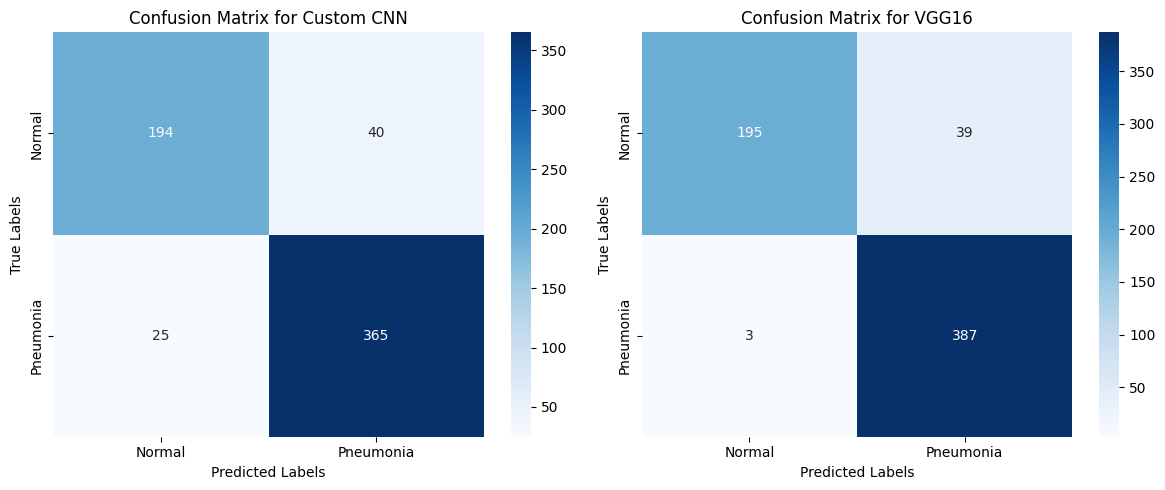

In [ ]:
# Menampilkan confusion matrix menggunakan seaborn
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title('Confusion Matrix for Custom CNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 2, 2)
sns.heatmap(cm_vgg16, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title('Confusion Matrix for VGG16')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

In [ ]:
# Membuat dataframe untuk hasil prediksi
results_df = pd.DataFrame({
    'Model': ['Custom CNN', 'VGG16'],
    'Validation Loss': [score[0], score_vgg16_val[0]],
    'Validation Accuracy': [score[1], score_vgg16_val[1]],
    'Test Loss': [score[0], score_vgg16_test[0]],
    'Test Accuracy': [score[1], score_vgg16_test[1]]
})

# Menampilkan tabel hasil
results_df


,Model,Validation Loss,Validation Accuracy,Test Loss,Test Accuracy
0,Custom CNN,0.239879,0.895833,0.239879,0.895833
1,VGG16,0.081654,0.970392,0.182237,0.932692
